##### About this notebook:

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------
# Author:             Erick Rico Esparza
# Dates:              Sep 18 - 26, 2025
# Description:        This notebook further explores datasets from HK and Mexico City, aiming to prepare the Week 3 presentation.
#-----------------------------------------------------------------------------------------------------------------------------

# Week 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Data Exploration & Cleaning

In [12]:
df_hk = pd.read_csv("cleaned_hk_air_2012-2024.csv")
df_mc = pd.read_csv("cleaned_cdmx_air_2012-2024.csv")

In [13]:
print(df_hk.info())
print(df_mc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45453 entries, 0 to 45452
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     45453 non-null  object
 1   STATION  45453 non-null  object
 2   SO2      45453 non-null  int64 
 3   NO2      45453 non-null  int64 
 4   PM10     45453 non-null  int64 
 5   O3       45453 non-null  int64 
 6   PM2.5    45453 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27399 entries, 0 to 27398
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     27399 non-null  object
 1   STATION  27399 non-null  object
 2   NO2      27399 non-null  int64 
 3   O3       27399 non-null  int64 
 4   PM10     27399 non-null  int64 
 5   PM2.5    27399 non-null  int64 
 6   SO2      27399 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.5+ MB
None


In [14]:
df_hk['DATE'] = pd.to_datetime(df_hk['DATE'], dayfirst=True, errors='coerce')
df_mc['DATE'] = pd.to_datetime(df_mc['DATE'], dayfirst=True, errors='coerce')

In [15]:
print(df_hk.info())
print(df_mc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45453 entries, 0 to 45452
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     45453 non-null  datetime64[ns]
 1   STATION  45453 non-null  object        
 2   SO2      45453 non-null  int64         
 3   NO2      45453 non-null  int64         
 4   PM10     45453 non-null  int64         
 5   O3       45453 non-null  int64         
 6   PM2.5    45453 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27399 entries, 0 to 27398
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     27399 non-null  datetime64[ns]
 1   STATION  27399 non-null  object        
 2   NO2      27399 non-null  int64         
 3   O3       27399 non-null  int64         
 4   PM10     27399 non-null  int64

## Data Analysis

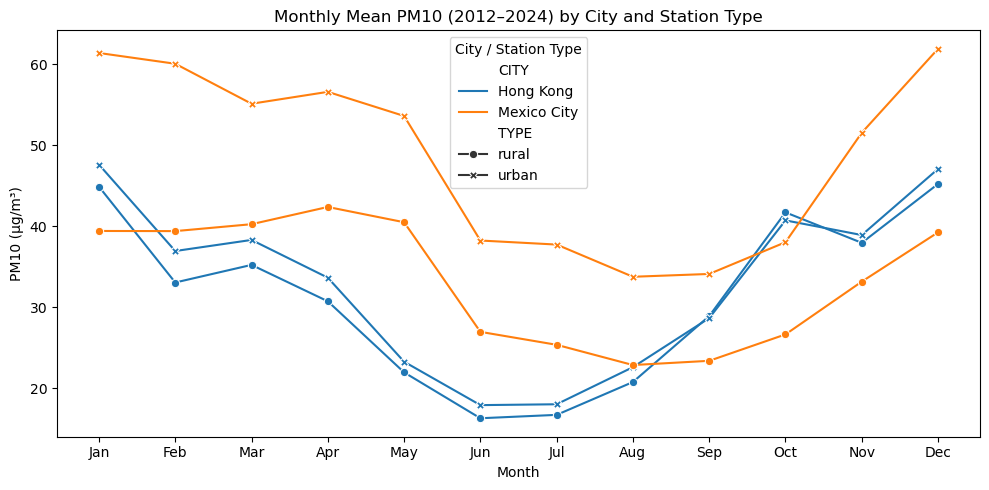

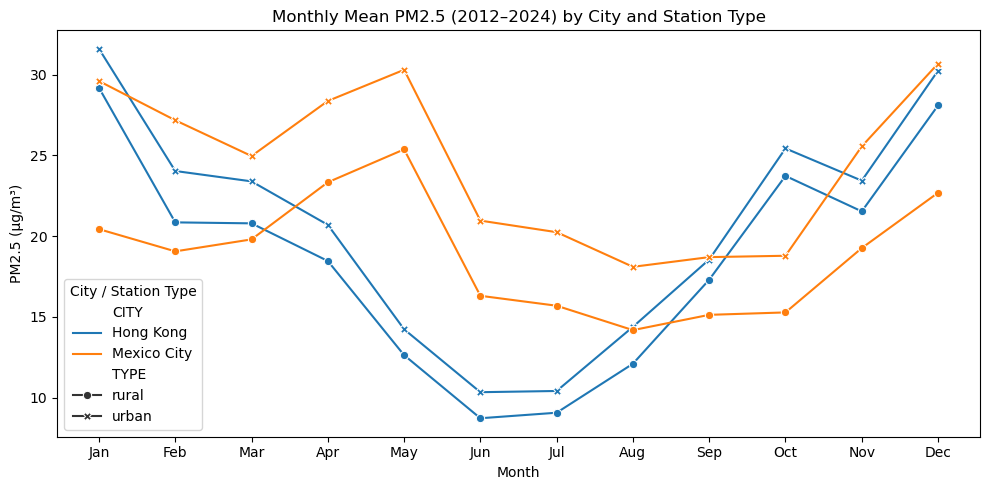

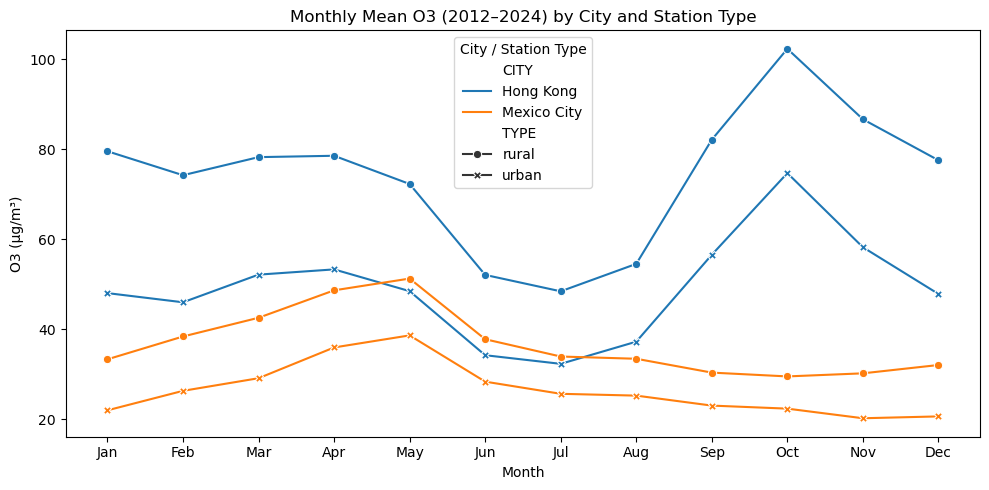

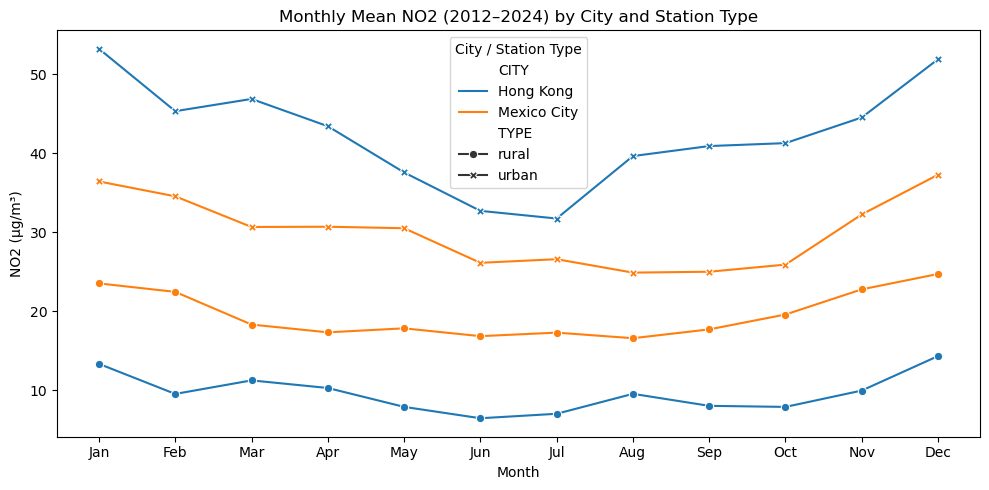

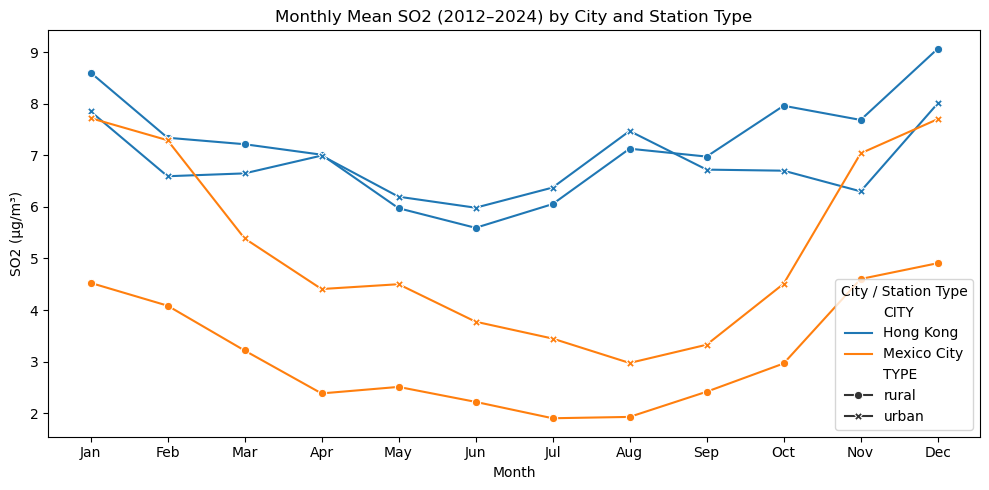

In [16]:
# 1. Assign station type to each row

# Hong Kong mapping (all urban except TAP MUN)
hk_station_type = {
    'CENTRAL/WESTERN': 'urban',
    'EASTERN': 'urban',
    'KWUN TONG': 'urban',
    'SHAM SHUI PO': 'urban',
    'SHATIN': 'urban',
    'TAI PO': 'urban',
    'TAP MUN': 'rural',
    'TSUEN WAN': 'urban',
    'TUNG CHUNG': 'urban',
    'YUEN LONG': 'urban'
}
df_hk['TYPE'] = df_hk['STATION'].map(hk_station_type)
df_hk['CITY'] = 'Hong Kong'

# Mexico City mapping (all urban except AJUSCO MEDIO and PEDREGAL)
mx_station_type = {
    'AJUSCO MEDIO': 'rural',
    'CAMARONES': 'urban',
    'HOSPITAL GENERAL DE MEXICO': 'urban',
    'MERCED': 'urban',
    'MIGUEL HIDALGO': 'urban',
    'PEDREGAL': 'rural',
    'SAN AGUSTIN': 'urban',
    'TLALNEPANTLA': 'urban',
    'UAM IZTAPALAPA': 'urban',
    'XALOSTOC': 'urban'
}
df_mc['TYPE'] = df_mc['STATION'].map(mx_station_type)
df_mc['CITY'] = 'Mexico City'

# 2. Concatenate both DataFrames for joint analysis
df_all = pd.concat([df_hk, df_mc], ignore_index=True)

# 3. Extract month as a string (e.g., 'Jan', 'Feb', ...)
df_all['MONTH'] = df_all['DATE'].dt.month
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_all['MONTH_NAME'] = df_all['MONTH'].apply(lambda x: month_labels[x-1])

# 4. Calculate monthly means by city, station type, and month
pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
monthly_means = df_all.groupby(['CITY', 'TYPE', 'MONTH_NAME'])[pollutants].mean().reset_index()

# Ensure months are ordered correctly for plotting
monthly_means['MONTH_NUM'] = monthly_means['MONTH_NAME'].map({name: i+1 for i, name in enumerate(month_labels)})
monthly_means = monthly_means.sort_values('MONTH_NUM')

# 5. Plot monthly means for each pollutant, by city and station type
for pol in pollutants:
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=monthly_means,
        x='MONTH_NAME',
        y=pol,
        hue='CITY',
        style='TYPE',
        markers=True,
        dashes=False
    )
    plt.title(f'Monthly Mean {pol} (2012–2024) by City and Station Type')
    plt.xlabel('Month')
    plt.ylabel(f'{pol} (µg/m³)')
    plt.legend(title='City / Station Type')
    plt.tight_layout()
    plt.show()

**PM10 (Particulate Matter 10 µm):**
- Mexico City (urban) has the highest PM10 throughout the year, peaking in winter (Dec–Jan) and lowest in summer (Aug-Sep).
- Hong Kong (urban and rural) shows a similar seasonal pattern: higher in winter, lower in summer.
- Rural sites in both cities have lower PM10 than urban, but the seasonal trend is consistent.
- Winter is the most polluted season for PM10 in both cities, likely due to meteorology and increased emissions.

**PM2.5 (Particulate Matter 2.5 µm):**
- Mexico City (urban) again leads in PM2.5, with a clear winter peak and summer/autumn minimum, but there is also a spring peak in May.
- Hong Kong (urban and rural) follows the same pattern as PM10, but with lower values.
- Fine particulate pollution is highest in winter, lowest in summer, in both cities.

**O3 (Ozone):**
- Hong Kong (rural) has the highest O3, peaking sharply in autumn (Sep–Oct).
- Hong Kong (urban) also shows a strong autumn peak, but lower than rural.
- Mexico City (urban and rural) has much lower O3, with a mild spring/early summer peak.
- Ozone peaks in autumn in Hong Kong, especially at rural sites, while Mexico City has lower, flatter O3 seasonality.

**NO2 (Nitrogen Dioxide):**
- Hong Kong (urban) has the highest NO2, peaking in winter and dipping in summer.
- Mexico City (urban) is lower, with a similar winter peak and summer minimum.
- Rural sites in both cities have much lower NO2, with a flatter seasonal pattern.
- NO2 is highest in winter, especially in urban Hong Kong, reflecting traffic and atmospheric conditions.

**SO2 (Sulfur Dioxide):**
- Hong Kong (urban and rural) has higher SO2 than Mexico City, with a winter peak and summer minimum.
- Only in summer, Hong Kong's urban stations show higher concentration than the rural one.
- Mexico City (urban and rural) shows a similar but more pronounced pattern, where the urban stations show higher concentration than the rural ones throughout the year, with overall lower SO2 than Hong Kong.
- SO2 is generally low, but peaks in winter in both cities, more so in Hong Kong.